In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.41449 stdev: 0.21326
Best fitness: 0.97099 - size: (2, 7) - species 4 - id 103
Average adjusted fitness: 0.345
Mean genetic distance 2.895, standard deviation 0.517
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 5.299 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.50813 stdev: 0.23474
Best fitness: 0.97163 - size: (3, 8) - species 3 - id 284
Average adjusted fitness: 0.470
Mean genetic distance 2.920, standard deviation 0.511
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.202 sec (5.250 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54602 stdev: 0.24710
Best fitness: 0.98968 - size: (4, 11) - species 11 - id 530
Average adjusted fitness: 0.436
Mean genetic distance 2.961, standard deviation 0.523
Population of 201 members in 27 species
Total extinctio

Population's average fitness: 0.52121 stdev: 0.06759
Best fitness: 0.86965 - size: (4, 11) - species 5 - id 540
Average adjusted fitness: 0.438
Mean genetic distance 2.876, standard deviation 0.511
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.250 sec (6.420 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53217 stdev: 0.08734
Best fitness: 0.94343 - size: (2, 8) - species 2 - id 877
Average adjusted fitness: 0.294
Mean genetic distance 2.881, standard deviation 0.515
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.408 sec (6.251 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53878 stdev: 0.09793
Best fitness: 0.94688 - size: (3, 12) - species 21 - id 1086
Average adjusted fitness: 0.495
Mean genetic distance 2.894, standard deviation 0.518
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.559 sec (6.152 average)

 ****** Runnin

Population's average fitness: 0.59476 stdev: 0.22773
Best fitness: 0.97377 - size: (4, 12) - species 24 - id 1404
Average adjusted fitness: 0.546
Mean genetic distance 3.081, standard deviation 0.517
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 4.513 sec (4.166 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59092 stdev: 0.23730
Best fitness: 0.97377 - size: (4, 12) - species 24 - id 1404
Average adjusted fitness: 0.478
Mean genetic distance 3.055, standard deviation 0.505
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.419 sec (4.191 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60369 stdev: 0.23318
Best fitness: 0.97377 - size: (4, 12) - species 24 - id 1404
Average adjusted fitness: 0.315
Mean genetic distance 3.069, standard deviation 0.523
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 4.510 sec (4.292 average)

 ****** 

Population's average fitness: 0.57581 stdev: 0.21904
Best fitness: 0.91894 - size: (5, 13) - species 13 - id 1962
Average adjusted fitness: 0.361
Mean genetic distance 3.010, standard deviation 0.518
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.021 sec (4.783 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59392 stdev: 0.21168
Best fitness: 0.92477 - size: (3, 7) - species 2 - id 2124
Average adjusted fitness: 0.463
Mean genetic distance 2.966, standard deviation 0.519
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.201 sec (4.869 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58481 stdev: 0.21702
Best fitness: 0.92477 - size: (3, 7) - species 2 - id 2124
Average adjusted fitness: 0.338
Mean genetic distance 2.976, standard deviation 0.540
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.211 sec (4.941 average)

 ****** Run


 ****** Running generation 16 ****** 

Population's average fitness: 0.58871 stdev: 0.16272
Best fitness: 0.98104 - size: (5, 14) - species 9 - id 1166
Average adjusted fitness: 0.337
Mean genetic distance 3.039, standard deviation 0.521
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.492 sec (7.750 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58450 stdev: 0.16515
Best fitness: 0.98104 - size: (5, 14) - species 9 - id 1166
Average adjusted fitness: 0.334
Mean genetic distance 3.055, standard deviation 0.531
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 6.875 sec (7.807 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61013 stdev: 0.17368
Best fitness: 0.98104 - size: (5, 14) - species 9 - id 1166
Average adjusted fitness: 0.191
Mean genetic distance 3.079, standard deviation 0.532
Population of 195 members in 30 species
Total extinctions: 0
Generation tim

number of class2:415

 ****** Running generation 0 ****** 

Population's average fitness: 0.47079 stdev: 0.13677
Best fitness: 0.94855 - size: (2, 7) - species 5 - id 155
Average adjusted fitness: 0.446
Mean genetic distance 2.859, standard deviation 0.522
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 2.089 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53769 stdev: 0.15761
Best fitness: 0.97204 - size: (3, 9) - species 1 - id 360
Average adjusted fitness: 0.471
Mean genetic distance 2.952, standard deviation 0.542
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 3.055 sec (2.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57448 stdev: 0.18001
Best fitness: 0.97204 - size: (3, 9) - species 4 - id 360
Average adjusted fitness: 0.510
Mean genetic distance 2.962, standard deviation 0.554
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 3

Population's average fitness: 0.55563 stdev: 0.13119
Best fitness: 0.91781 - size: (3, 10) - species 3 - id 828
Average adjusted fitness: 0.359
Mean genetic distance 3.109, standard deviation 0.529
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 2.849 sec (2.651 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57177 stdev: 0.14651
Best fitness: 0.91781 - size: (3, 10) - species 7 - id 828
Average adjusted fitness: 0.385
Mean genetic distance 3.173, standard deviation 0.515
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 2.976 sec (2.705 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58133 stdev: 0.14010
Best fitness: 0.91781 - size: (3, 10) - species 7 - id 828
Average adjusted fitness: 0.159
Mean genetic distance 3.203, standard deviation 0.510
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.015 sec (2.750 average)

 ****** Running

Population's average fitness: 0.65955 stdev: 0.23972
Best fitness: 0.98088 - size: (3, 9) - species 17 - id 344
Average adjusted fitness: 0.610
Mean genetic distance 3.061, standard deviation 0.514
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.464 sec (4.556 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66750 stdev: 0.23849
Best fitness: 0.98088 - size: (3, 9) - species 17 - id 344
Average adjusted fitness: 0.632
Mean genetic distance 3.074, standard deviation 0.528
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.290 sec (4.630 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67276 stdev: 0.24137
Best fitness: 0.98088 - size: (3, 9) - species 17 - id 344
Average adjusted fitness: 0.651
Mean genetic distance 3.088, standard deviation 0.528
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 4.992 sec (4.787 average)

 ****** Runnin

Population's average fitness: 0.53977 stdev: 0.19303
Best fitness: 0.70858 - size: (3, 9) - species 13 - id 281
Average adjusted fitness: 0.221
Mean genetic distance 2.922, standard deviation 0.562
Population of 208 members in 27 species
Total extinctions: 0
Generation time: 3.967 sec (4.166 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.54499 stdev: 0.19144
Best fitness: 0.70858 - size: (3, 9) - species 13 - id 281
Average adjusted fitness: 0.227
Mean genetic distance 2.899, standard deviation 0.543
Population of 209 members in 27 species
Total extinctions: 0
Generation time: 4.096 sec (4.175 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55470 stdev: 0.18697
Best fitness: 0.70858 - size: (3, 9) - species 13 - id 281
Average adjusted fitness: 0.251
Mean genetic distance 2.906, standard deviation 0.554
Population of 208 members in 27 species
Total extinctions: 0
Generation time: 4.031 sec (4.200 average)

 ****** Runni

Population's average fitness: 0.61338 stdev: 0.19520
Best fitness: 0.94969 - size: (7, 15) - species 29 - id 1299
Average adjusted fitness: 0.417
Mean genetic distance 3.198, standard deviation 0.540
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 4.950 sec (4.805 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59104 stdev: 0.20941
Best fitness: 0.94969 - size: (7, 15) - species 29 - id 1299
Average adjusted fitness: 0.296
Mean genetic distance 3.213, standard deviation 0.535
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 4.763 sec (4.840 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59648 stdev: 0.20731
Best fitness: 0.94969 - size: (7, 15) - species 29 - id 1299
Average adjusted fitness: 0.483
Mean genetic distance 3.216, standard deviation 0.533
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 5.148 sec (4.882 average)

 ******

Population's average fitness: 0.50663 stdev: 0.06026
Best fitness: 0.69944 - size: (2, 7) - species 4 - id 37
Average adjusted fitness: 0.330
Mean genetic distance 2.766, standard deviation 0.469
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 2.520 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51821 stdev: 0.04908
Best fitness: 0.81808 - size: (3, 9) - species 5 - id 261
Average adjusted fitness: 0.244
Mean genetic distance 2.926, standard deviation 0.529
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 2.615 sec (2.568 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52327 stdev: 0.06313
Best fitness: 0.82938 - size: (3, 10) - species 1 - id 517
Average adjusted fitness: 0.240
Mean genetic distance 2.974, standard deviation 0.547
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 2.762 sec (2.633 average)

 ****** Running generation 3 *****

Population's average fitness: 0.62056 stdev: 0.17234
Best fitness: 0.72264 - size: (2, 8) - species 5 - id 543
Average adjusted fitness: 0.319
Mean genetic distance 2.959, standard deviation 0.496
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.736 sec (4.884 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62489 stdev: 0.17041
Best fitness: 0.72264 - size: (2, 8) - species 5 - id 543
Average adjusted fitness: 0.377
Mean genetic distance 2.966, standard deviation 0.495
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.358 sec (4.809 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63078 stdev: 0.16510
Best fitness: 0.72264 - size: (2, 8) - species 5 - id 543
Average adjusted fitness: 0.336
Mean genetic distance 2.990, standard deviation 0.494
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.581 sec (4.780 average)

 ****** Running ge

Population's average fitness: 0.62427 stdev: 0.18480
Best fitness: 0.91446 - size: (4, 10) - species 26 - id 1019
Average adjusted fitness: 0.370
Mean genetic distance 3.051, standard deviation 0.537
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 4.934 sec (4.657 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65408 stdev: 0.17296
Best fitness: 0.91446 - size: (4, 10) - species 26 - id 1019
Average adjusted fitness: 0.340
Mean genetic distance 3.052, standard deviation 0.539
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 4.844 sec (4.784 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60996 stdev: 0.20279
Best fitness: 0.91446 - size: (4, 10) - species 26 - id 1019
Average adjusted fitness: 0.414
Mean genetic distance 3.036, standard deviation 0.531
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 4.971 sec (4.886 average)

 ******

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.7315

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2 5] real:3
#6 index:[3] real:3
#7 index:[2] real:3
#8 index:[5] real:3
#9 index:[2] real:3
#10 index:[2 5] real:3
#11 index:[3 5] real:3
#12 index:[5] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2 3 5] real:2
#24 index:[2] real:2
#25 index:[2 5] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[2] real:5
#29 index:[5] real:5
#30 index:[3] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2] real:3
#38 index:[2] real:3
#39 index:[2] real:3
#40 index:[5] real:3
#41 index:[4] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2 3 5] real:2
#45 index:[2] real:2
#46 index:[2] real:2
#47 ind

#576 index:[4] real:4
#577 index:[1] real:1
#578 index:[1] real:1
#579 index:[5] real:3
#580 index:[5] real:3
#581 index:[2] real:3
#582 index:[2 3 5] real:3
#583 index:[2] real:2
#584 index:[2] real:2
#585 index:[5] real:2
#586 index:[1] real:1
#587 index:[1] real:1
#588 index:[5] real:5
#589 index:[2 3 5] real:5
#590 index:[5] real:5
#591 index:[2 3 5] real:5
#592 index:[3] real:5
#593 index:[5] real:5
#594 index:[2 4] real:5
#595 index:[4] real:4
#596 index:[4] real:4
#597 index:[4] real:4
#598 index:[4] real:4
#599 index:[4] real:4
#600 index:[4] real:4
#601 index:[1] real:1
#602 index:[1] real:1
#603 index:[2] real:3
#604 index:[2] real:2
#605 index:[1] real:1
#606 index:[1] real:1
#607 index:[1] real:1
#608 index:[1] real:1
#609 index:[5] real:5
#610 index:[5] real:5
#611 index:[5] real:5
#612 index:[5] real:5
#613 index:[5] real:5
#614 index:[5] real:5
#615 index:[5] real:5
#616 index:[5] real:5
#617 index:[5] real:5
#618 index:[5] real:5
#619 index:[2] real:5
#620 index:[5] rea

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[440   8   5   2  18   2]
 [  0 201   0   0   3   1]
 [ 10   1 295 106  15  96]
 [  2   0  22  30   1  28]
 [  9  13   1   3 168  14]
 [  0   1  74  70  32 329]]


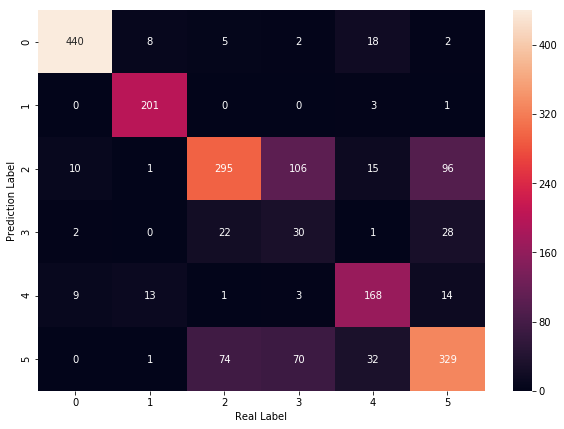

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()